# Note:
There is a strange python path issue on my computer, so I had to copy and paste the code from preprocessing.py. I could not figure out why it was parcing through files incorrectly.

[-5.1854499e-02 -5.3418957e-02 -4.9585227e-02 ... -8.3722104e-04
 -8.8218792e-04 -3.9141163e-05]


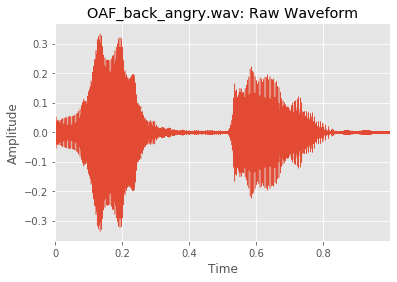

[-5.2724872e-02 -5.2330319e-02 -5.0256208e-02 ...  1.3096101e-03
 -3.2172837e-05 -3.9082411e-04]


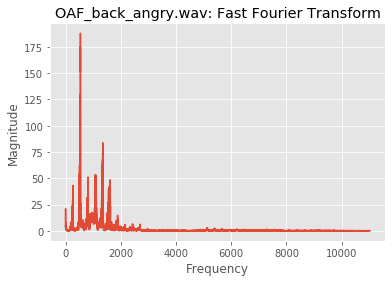

[-0.05311107 -0.05316687 -0.04861554 ... -0.00076086 -0.00083587
  0.00026538]


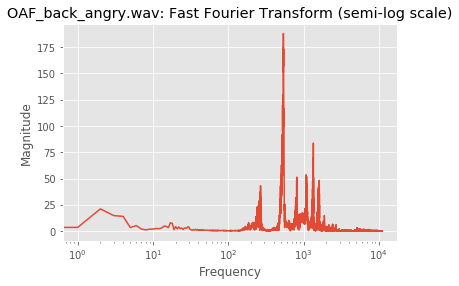

[-5.3043522e-02 -5.1742092e-02 -5.2065257e-02 ... -2.8747325e-05
 -9.0185786e-05 -9.0257707e-04]


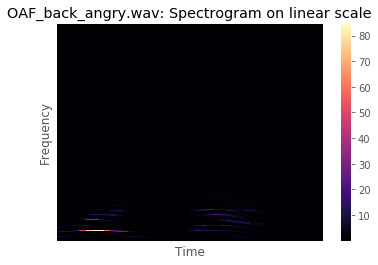

[-0.05307783 -0.05315751 -0.05059996 ... -0.00114948 -0.00015796
 -0.00062176]


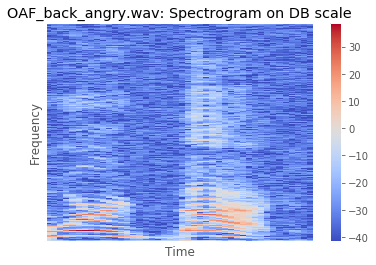

[-0.05260489 -0.05205234 -0.05062609 ... -0.00064262 -0.00160768
 -0.00090419]


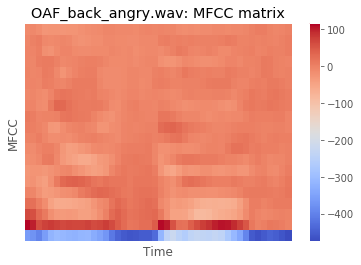

In [1]:
# NO NOISE
import visualizations as vz

file = 'TESS/OAF_angry/OAF_back_angry.wav'

vz.visualize_all(file)

[-0.0518193  -0.05415071 -0.0509621  ... -0.00122202  0.00011482
 -0.00011844]


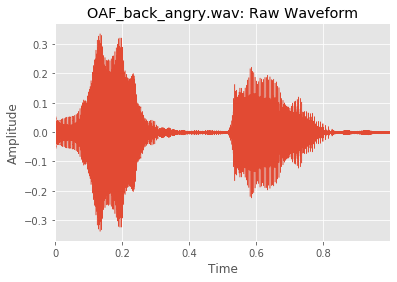

[-0.05285133 -0.05205322 -0.04906554 ... -0.00059546 -0.00072892
 -0.00088848]


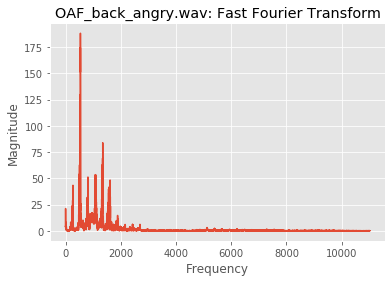

[-5.2894246e-02 -5.4237247e-02 -4.8641026e-02 ... -4.3462835e-05
  1.0379788e-03  5.3578301e-04]


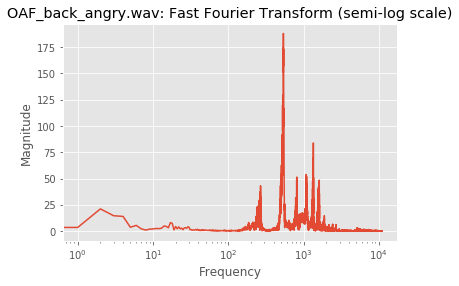

[-0.05344428 -0.05205856 -0.04804786 ...  0.00117835  0.00086409
  0.00041003]


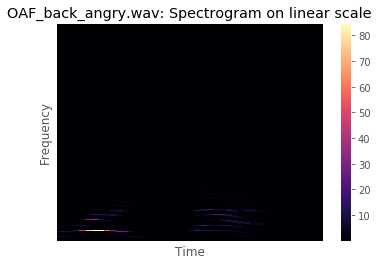

[-0.05443616 -0.05256628 -0.04922669 ...  0.00091037  0.00110987
 -0.00072749]


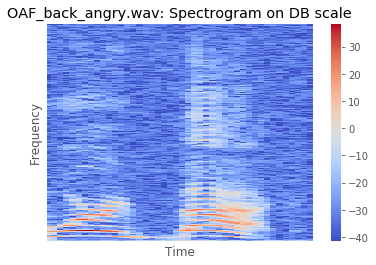

[-0.05208249 -0.05306587 -0.05127791 ...  0.00017923 -0.00094969
  0.00015681]


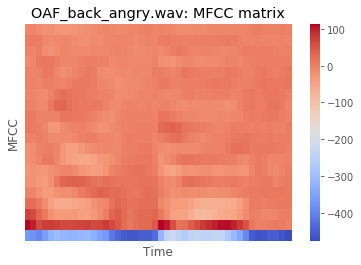

In [2]:
# LIGHT NOISE
import visualizations as vz

file = 'TESS/OAF_angry/OAF_back_angry.wav'

vz.visualize_all(file, noise=True)

[-0.05271755 -0.06388529 -0.05538521 ... -0.00523283 -0.01101758
  0.0158407 ]


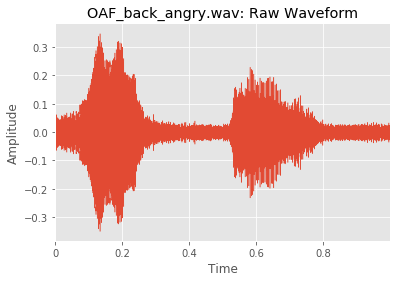

[-0.04907938 -0.03757744 -0.04341915 ...  0.01156346 -0.00581228
 -0.00472294]


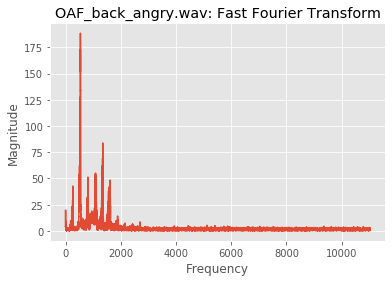

[-0.06574205 -0.06872716 -0.05851084 ... -0.0003375   0.01658077
 -0.00052059]


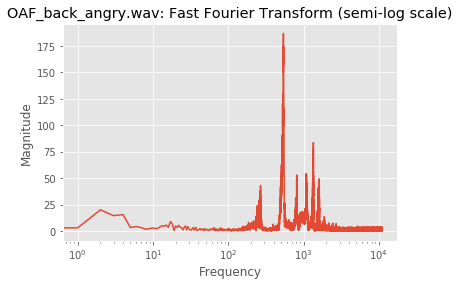

[-0.03536602 -0.03885493 -0.05123461 ... -0.00281484  0.007377
 -0.00879923]


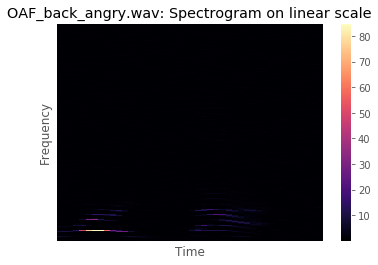

[-0.0525999  -0.04115732 -0.05009076 ...  0.00796804 -0.01115543
 -0.00289344]


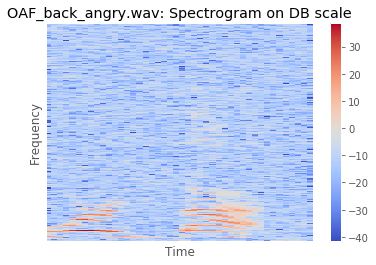

[-0.05870967 -0.07195248 -0.05436087 ...  0.0057143  -0.01101374
 -0.0139943 ]


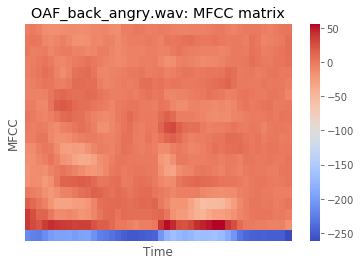

In [3]:
# HEAVY NOISE
import visualizations as vz

file = 'TESS/OAF_angry/OAF_back_angry.wav'

vz.visualize_all(file, noise=True, amount=0.01)

In [4]:
import os
import librosa
import json
import math
import numpy as np

DATASET_PATH = 'TESS'
JSON_PATH = 'data-no-noise.json'

SAMPLE_RATE = 22050

def add_noise(data):
        noise = np.random.randn(len(data))
        data_noise = data + (0.001 * noise)
        return data_noise

def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, noise=False):
    
    # dictionary to store data
    data = {
        'mapping': [],
        'mfcc': [], # training input
        'labels': [], # expected values
    }
    
    samples_per_file = SAMPLE_RATE * 1#duration
    expected_num_mfcc_vectors = math.ceil(samples_per_file / hop_length)
    
    # Each 1 second sample will preprocess into a 13x44 matrix
    #loop through all the categories    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        
        # want to ensure we're not at the root level
        if dirpath is not dataset_path:
            
            # save the semantic label
            dirpath_components = dirpath.split('/') # TESS/OAF_angry
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing {}".format(semantic_label))
            
            # process files for each emotion.
            for f in filenames:
                
                # load the audio file
                file_path =  os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
                signal = signal[-sr:]
                
                if noise:
                    signal = add_noise(signal)
                
                # extract mfcc from each file and store data
                mfcc = librosa.feature.mfcc(signal, sr=sr,
                                            n_fft=n_fft,
                                            n_mfcc=n_mfcc,
                                            hop_length=hop_length)
                mfcc =  mfcc.T
                
                data['mfcc'].append(mfcc.tolist())
                data['labels'].append(i-1)
                print("{}".format(file_path))

    fp = open(json_path, 'w')
    json.dump(data, fp, indent=4)
    fp.close()

def main():
    save_mfcc(DATASET_PATH, JSON_PATH, noise=False)

main()


Processing TESS\OAF_angry
TESS\OAF_angry\OAF_back_angry.wav
TESS\OAF_angry\OAF_bar_angry.wav
TESS\OAF_angry\OAF_base_angry.wav
TESS\OAF_angry\OAF_bath_angry.wav
TESS\OAF_angry\OAF_bean_angry.wav
TESS\OAF_angry\OAF_beg_angry.wav
TESS\OAF_angry\OAF_bite_angry.wav
TESS\OAF_angry\OAF_boat_angry.wav
TESS\OAF_angry\OAF_bone_angry.wav
TESS\OAF_angry\OAF_book_angry.wav
TESS\OAF_angry\OAF_bought_angry.wav
TESS\OAF_angry\OAF_burn_angry.wav
TESS\OAF_angry\OAF_cab_angry.wav
TESS\OAF_angry\OAF_calm_angry.wav
TESS\OAF_angry\OAF_came_angry.wav
TESS\OAF_angry\OAF_cause_angry.wav
TESS\OAF_angry\OAF_chain_angry.wav
TESS\OAF_angry\OAF_chair_angry.wav
TESS\OAF_angry\OAF_chalk_angry.wav
TESS\OAF_angry\OAF_chat_angry.wav
TESS\OAF_angry\OAF_check_angry.wav
TESS\OAF_angry\OAF_cheek_angry.wav
TESS\OAF_angry\OAF_chief_angry.wav
TESS\OAF_angry\OAF_choice_angry.wav
TESS\OAF_angry\OAF_cool_angry.wav
TESS\OAF_angry\OAF_dab_angry.wav
TESS\OAF_angry\OAF_date_angry.wav
TESS\OAF_angry\OAF_dead_angry.wav
TESS\OAF_angry

TESS\OAF_disgust\OAF_fail_disgust.wav
TESS\OAF_disgust\OAF_fall_disgust.wav
TESS\OAF_disgust\OAF_far_disgust.wav
TESS\OAF_disgust\OAF_fat_disgust.wav
TESS\OAF_disgust\OAF_fit_disgust.wav
TESS\OAF_disgust\OAF_five_disgust.wav
TESS\OAF_disgust\OAF_food_disgust.wav
TESS\OAF_disgust\OAF_gap_disgust.wav
TESS\OAF_disgust\OAF_gas_disgust.wav
TESS\OAF_disgust\OAF_gaze_disgust.wav
TESS\OAF_disgust\OAF_germ_disgust.wav
TESS\OAF_disgust\OAF_get_disgust.wav
TESS\OAF_disgust\OAF_gin_disgust.wav
TESS\OAF_disgust\OAF_goal_disgust.wav
TESS\OAF_disgust\OAF_good_disgust.wav
TESS\OAF_disgust\OAF_goose_disgust.wav
TESS\OAF_disgust\OAF_gun_disgust.wav
TESS\OAF_disgust\OAF_half_disgust.wav
TESS\OAF_disgust\OAF_hall_disgust.wav
TESS\OAF_disgust\OAF_hash_disgust.wav
TESS\OAF_disgust\OAF_hate_disgust.wav
TESS\OAF_disgust\OAF_have_disgust.wav
TESS\OAF_disgust\OAF_haze_disgust.wav
TESS\OAF_disgust\OAF_hire_disgust.wav
TESS\OAF_disgust\OAF_hit_disgust.wav
TESS\OAF_disgust\OAF_hole_disgust.wav
TESS\OAF_disgust\OAF

TESS\OAF_fear\OAF_jail_fear.wav
TESS\OAF_fear\OAF_jar_fear.wav
TESS\OAF_fear\OAF_join_fear.wav
TESS\OAF_fear\OAF_judge_fear.wav
TESS\OAF_fear\OAF_jug_fear.wav
TESS\OAF_fear\OAF_juice_fear.wav
TESS\OAF_fear\OAF_keen_fear.wav
TESS\OAF_fear\OAF_keep_fear.wav
TESS\OAF_fear\OAF_keg_fear.wav
TESS\OAF_fear\OAF_kick_fear.wav
TESS\OAF_fear\OAF_kill_fear.wav
TESS\OAF_fear\OAF_king_fear.wav
TESS\OAF_fear\OAF_kite_fear.wav
TESS\OAF_fear\OAF_knock_fear.wav
TESS\OAF_fear\OAF_late_fear.wav
TESS\OAF_fear\OAF_laud_fear.wav
TESS\OAF_fear\OAF_lean_fear.wav
TESS\OAF_fear\OAF_learn_fear.wav
TESS\OAF_fear\OAF_lease_fear.wav
TESS\OAF_fear\OAF_lid_fear.wav
TESS\OAF_fear\OAF_life_fear.wav
TESS\OAF_fear\OAF_limb_fear.wav
TESS\OAF_fear\OAF_live_fear.wav
TESS\OAF_fear\OAF_loaf_fear.wav
TESS\OAF_fear\OAF_long_fear.wav
TESS\OAF_fear\OAF_lore_fear.wav
TESS\OAF_fear\OAF_lose_fear.wav
TESS\OAF_fear\OAF_lot_fear.wav
TESS\OAF_fear\OAF_love_fear.wav
TESS\OAF_fear\OAF_luck_fear.wav
TESS\OAF_fear\OAF_make_fear.wav
TESS\OAF

TESS\OAF_happy\OAF_pad_happy.wav
TESS\OAF_happy\OAF_page_happy.wav
TESS\OAF_happy\OAF_pain_happy.wav
TESS\OAF_happy\OAF_pass_happy.wav
TESS\OAF_happy\OAF_pearl_happy.wav
TESS\OAF_happy\OAF_peg_happy.wav
TESS\OAF_happy\OAF_perch_happy.wav
TESS\OAF_happy\OAF_phone_happy.wav
TESS\OAF_happy\OAF_pick_happy.wav
TESS\OAF_happy\OAF_pike_happy.wav
TESS\OAF_happy\OAF_pole_happy.wav
TESS\OAF_happy\OAF_pool_happy.wav
TESS\OAF_happy\OAF_puff_happy.wav
TESS\OAF_happy\OAF_rag_happy.wav
TESS\OAF_happy\OAF_raid_happy.wav
TESS\OAF_happy\OAF_rain_happy.wav
TESS\OAF_happy\OAF_raise_happy.wav
TESS\OAF_happy\OAF_rat_happy.wav
TESS\OAF_happy\OAF_reach_happy.wav
TESS\OAF_happy\OAF_read_happy.wav
TESS\OAF_happy\OAF_red_happy.wav
TESS\OAF_happy\OAF_ring_happy.wav
TESS\OAF_happy\OAF_ripe_happy.wav
TESS\OAF_happy\OAF_road_happy.wav
TESS\OAF_happy\OAF_room_happy.wav
TESS\OAF_happy\OAF_rose_happy.wav
TESS\OAF_happy\OAF_rot_happy.wav
TESS\OAF_happy\OAF_rough_happy.wav
TESS\OAF_happy\OAF_rush_happy.wav
TESS\OAF_happy

TESS\OAF_neutral\OAF_rough_neutral.wav
TESS\OAF_neutral\OAF_rush_neutral.wav
TESS\OAF_neutral\OAF_said_neutral.wav
TESS\OAF_neutral\OAF_sail_neutral.wav
TESS\OAF_neutral\OAF_search_neutral.wav
TESS\OAF_neutral\OAF_seize_neutral.wav
TESS\OAF_neutral\OAF_sell_neutral.wav
TESS\OAF_neutral\OAF_shack_neutral.wav
TESS\OAF_neutral\OAF_shall_neutral.wav
TESS\OAF_neutral\OAF_shawl_neutral.wav
TESS\OAF_neutral\OAF_sheep_neutral.wav
TESS\OAF_neutral\OAF_shirt_neutral.wav
TESS\OAF_neutral\OAF_should_neutral.wav
TESS\OAF_neutral\OAF_shout_neutral.wav
TESS\OAF_neutral\OAF_size_neutral.wav
TESS\OAF_neutral\OAF_soap_neutral.wav
TESS\OAF_neutral\OAF_soup_neutral.wav
TESS\OAF_neutral\OAF_sour_neutral.wav
TESS\OAF_neutral\OAF_south_neutral.wav
TESS\OAF_neutral\OAF_sub_neutral.wav
TESS\OAF_neutral\OAF_such_neutral.wav
TESS\OAF_neutral\OAF_sure_neutral.wav
TESS\OAF_neutral\OAF_take_neutral.wav
TESS\OAF_neutral\OAF_talk_neutral.wav
TESS\OAF_neutral\OAF_tape_neutral.wav
TESS\OAF_neutral\OAF_team_neutral.wav


TESS\OAF_pleasant_surprise\OAF_rose_ps.wav
TESS\OAF_pleasant_surprise\OAF_rot_ps.wav
TESS\OAF_pleasant_surprise\OAF_rough_ps.wav
TESS\OAF_pleasant_surprise\OAF_rush_ps.wav
TESS\OAF_pleasant_surprise\OAF_said_ps.wav
TESS\OAF_pleasant_surprise\OAF_sail_ps.wav
TESS\OAF_pleasant_surprise\OAF_search_ps.wav
TESS\OAF_pleasant_surprise\OAF_seize_ps.wav
TESS\OAF_pleasant_surprise\OAF_sell_ps.wav
TESS\OAF_pleasant_surprise\OAF_shack_ps.wav
TESS\OAF_pleasant_surprise\OAF_shall_ps.wav
TESS\OAF_pleasant_surprise\OAF_shawl_ps.wav
TESS\OAF_pleasant_surprise\OAF_sheep_ps.wav
TESS\OAF_pleasant_surprise\OAF_shirt_ps.wav
TESS\OAF_pleasant_surprise\OAF_should_ps.wav
TESS\OAF_pleasant_surprise\OAF_shout_ps.wav
TESS\OAF_pleasant_surprise\OAF_size_ps.wav
TESS\OAF_pleasant_surprise\OAF_soap_ps.wav
TESS\OAF_pleasant_surprise\OAF_soup_ps.wav
TESS\OAF_pleasant_surprise\OAF_sour_ps.wav
TESS\OAF_pleasant_surprise\OAF_south_ps.wav
TESS\OAF_pleasant_surprise\OAF_sub_ps.wav
TESS\OAF_pleasant_surprise\OAF_such_ps.wav


TESS\OAF_sad\OAF_wash_sad.wav
TESS\OAF_sad\OAF_week_sad.wav
TESS\OAF_sad\OAF_wheat_sad.wav
TESS\OAF_sad\OAF_when_sad.wav
TESS\OAF_sad\OAF_which_sad.wav
TESS\OAF_sad\OAF_whip_sad.wav
TESS\OAF_sad\OAF_white_sad.wav
TESS\OAF_sad\OAF_wife_sad.wav
TESS\OAF_sad\OAF_wire_sad.wav
TESS\OAF_sad\OAF_witch_sad.wav
TESS\OAF_sad\OAF_yearn_sad.wav
TESS\OAF_sad\OAF_yes_sad.wav
TESS\OAF_sad\OAF_young_sad.wav
TESS\OAF_sad\OAF_youth_sad.wav

Processing TESS\YAF_angry
TESS\YAF_angry\YAF_back_angry.wav
TESS\YAF_angry\YAF_bar_angry.wav
TESS\YAF_angry\YAF_base_angry.wav
TESS\YAF_angry\YAF_bath_angry.wav
TESS\YAF_angry\YAF_bean_angry.wav
TESS\YAF_angry\YAF_beg_angry.wav
TESS\YAF_angry\YAF_bite_angry.wav
TESS\YAF_angry\YAF_boat_angry.wav
TESS\YAF_angry\YAF_bone_angry.wav
TESS\YAF_angry\YAF_book_angry.wav
TESS\YAF_angry\YAF_bought_angry.wav
TESS\YAF_angry\YAF_burn_angry.wav
TESS\YAF_angry\YAF_cab_angry.wav
TESS\YAF_angry\YAF_calm_angry.wav
TESS\YAF_angry\YAF_came_angry.wav
TESS\YAF_angry\YAF_cause_angry.wav
TES

TESS\YAF_disgust\YAF_date_disgust.wav
TESS\YAF_disgust\YAF_dead_disgust.wav
TESS\YAF_disgust\YAF_death_disgust.wav
TESS\YAF_disgust\YAF_deep_disgust.wav
TESS\YAF_disgust\YAF_dime_disgust.wav
TESS\YAF_disgust\YAF_dip_disgust.wav
TESS\YAF_disgust\YAF_ditch_disgust.wav
TESS\YAF_disgust\YAF_dodge_disgust.wav
TESS\YAF_disgust\YAF_dog_disgust.wav
TESS\YAF_disgust\YAF_doll_disgust.wav
TESS\YAF_disgust\YAF_door_disgust.wav
TESS\YAF_disgust\YAF_fail_disgust.wav
TESS\YAF_disgust\YAF_fall_disgust.wav
TESS\YAF_disgust\YAF_far_disgust.wav
TESS\YAF_disgust\YAF_fat_disgust.wav
TESS\YAF_disgust\YAF_fit_disgust.wav
TESS\YAF_disgust\YAF_five_disgust.wav
TESS\YAF_disgust\YAF_food_disgust.wav
TESS\YAF_disgust\YAF_gap_disgust.wav
TESS\YAF_disgust\YAF_gas_disgust.wav
TESS\YAF_disgust\YAF_gaze_disgust.wav
TESS\YAF_disgust\YAF_germ_disgust.wav
TESS\YAF_disgust\YAF_get_disgust.wav
TESS\YAF_disgust\YAF_gin_disgust.wav
TESS\YAF_disgust\YAF_goal_disgust.wav
TESS\YAF_disgust\YAF_good_disgust.wav
TESS\YAF_disgust\Y

TESS\YAF_fear\YAF_goal_fear.wav
TESS\YAF_fear\YAF_good_fear.wav
TESS\YAF_fear\YAF_goose_fear.wav
TESS\YAF_fear\YAF_gun_fear.wav
TESS\YAF_fear\YAF_half_fear.wav
TESS\YAF_fear\YAF_hall_fear.wav
TESS\YAF_fear\YAF_hash_fear.wav
TESS\YAF_fear\YAF_hate_fear.wav
TESS\YAF_fear\YAF_have_fear.wav
TESS\YAF_fear\YAF_haze_fear.wav
TESS\YAF_fear\YAF_hire_fear.wav
TESS\YAF_fear\YAF_hit_fear.wav
TESS\YAF_fear\YAF_hole_fear.wav
TESS\YAF_fear\YAF_home_fear.wav
TESS\YAF_fear\YAF_hurl_fear.wav
TESS\YAF_fear\YAF_hush_fear.wav
TESS\YAF_fear\YAF_jail_fear.wav
TESS\YAF_fear\YAF_jar_fear.wav
TESS\YAF_fear\YAF_join_fear.wav
TESS\YAF_fear\YAF_judge_fear.wav
TESS\YAF_fear\YAF_jug_fear.wav
TESS\YAF_fear\YAF_juice_fear.wav
TESS\YAF_fear\YAF_keen_fear.wav
TESS\YAF_fear\YAF_keep_fear.wav
TESS\YAF_fear\YAF_keg_fear.wav
TESS\YAF_fear\YAF_kick_fear.wav
TESS\YAF_fear\YAF_kill_fear.wav
TESS\YAF_fear\YAF_king_fear.wav
TESS\YAF_fear\YAF_kite_fear.wav
TESS\YAF_fear\YAF_knock_fear.wav
TESS\YAF_fear\YAF_late_fear.wav
TESS\YAF_

TESS\YAF_happy\YAF_mob_happy.wav
TESS\YAF_happy\YAF_mode_happy.wav
TESS\YAF_happy\YAF_mood_happy.wav
TESS\YAF_happy\YAF_moon_happy.wav
TESS\YAF_happy\YAF_mop_happy.wav
TESS\YAF_happy\YAF_mouse_happy.wav
TESS\YAF_happy\YAF_nag_happy.wav
TESS\YAF_happy\YAF_name_happy.wav
TESS\YAF_happy\YAF_near_happy.wav
TESS\YAF_happy\YAF_neat_happy.wav
TESS\YAF_happy\YAF_nice_happy.wav
TESS\YAF_happy\YAF_note_happy.wav
TESS\YAF_happy\YAF_numb_happy.wav
TESS\YAF_happy\YAF_pad_happy.wav
TESS\YAF_happy\YAF_page_happy.wav
TESS\YAF_happy\YAF_pain_happy.wav
TESS\YAF_happy\YAF_pass_happy.wav
TESS\YAF_happy\YAF_pearl_happy.wav
TESS\YAF_happy\YAF_peg_happy.wav
TESS\YAF_happy\YAF_perch_happy.wav
TESS\YAF_happy\YAF_phone_happy.wav
TESS\YAF_happy\YAF_pick_happy.wav
TESS\YAF_happy\YAF_pike_happy.wav
TESS\YAF_happy\YAF_pole_happy.wav
TESS\YAF_happy\YAF_pool_happy.wav
TESS\YAF_happy\YAF_puff_happy.wav
TESS\YAF_happy\YAF_rag_happy.wav
TESS\YAF_happy\YAF_raid_happy.wav
TESS\YAF_happy\YAF_rain_happy.wav
TESS\YAF_happy\Y

TESS\YAF_neutral\YAF_rain_neutral.wav
TESS\YAF_neutral\YAF_raise_neutral.wav
TESS\YAF_neutral\YAF_rat_neutral.wav
TESS\YAF_neutral\YAF_reach_neutral.wav
TESS\YAF_neutral\YAF_read_neutral.wav
TESS\YAF_neutral\YAF_red_neutral.wav
TESS\YAF_neutral\YAF_ring_neutral.wav
TESS\YAF_neutral\YAF_ripe_neutral.wav
TESS\YAF_neutral\YAF_road_neutral.wav
TESS\YAF_neutral\YAF_room_neutral.wav
TESS\YAF_neutral\YAF_rose_neutral.wav
TESS\YAF_neutral\YAF_rot_neutral.wav
TESS\YAF_neutral\YAF_rough_neutral.wav
TESS\YAF_neutral\YAF_rush_neutral.wav
TESS\YAF_neutral\YAF_said_neutral.wav
TESS\YAF_neutral\YAF_sail_neutral.wav
TESS\YAF_neutral\YAF_search_neutral.wav
TESS\YAF_neutral\YAF_seize_neutral.wav
TESS\YAF_neutral\YAF_sell_neutral.wav
TESS\YAF_neutral\YAF_shack_neutral.wav
TESS\YAF_neutral\YAF_shall_neutral.wav
TESS\YAF_neutral\YAF_shawl_neutral.wav
TESS\YAF_neutral\YAF_sheep_neutral.wav
TESS\YAF_neutral\YAF_shirt_neutral.wav
TESS\YAF_neutral\YAF_should_neutral.wav
TESS\YAF_neutral\YAF_shout_neutral.wav
T

TESS\YAF_pleasant_surprised\YAF_rag_ps.wav
TESS\YAF_pleasant_surprised\YAF_raid_ps.wav
TESS\YAF_pleasant_surprised\YAF_rain_ps.wav
TESS\YAF_pleasant_surprised\YAF_raise_ps.wav
TESS\YAF_pleasant_surprised\YAF_rat_ps.wav
TESS\YAF_pleasant_surprised\YAF_reach_ps.wav
TESS\YAF_pleasant_surprised\YAF_read_ps.wav
TESS\YAF_pleasant_surprised\YAF_red_ps.wav
TESS\YAF_pleasant_surprised\YAF_ring_ps.wav
TESS\YAF_pleasant_surprised\YAF_ripe_ps.wav
TESS\YAF_pleasant_surprised\YAF_road_ps.wav
TESS\YAF_pleasant_surprised\YAF_room_ps.wav
TESS\YAF_pleasant_surprised\YAF_rose_ps.wav
TESS\YAF_pleasant_surprised\YAF_rot_ps.wav
TESS\YAF_pleasant_surprised\YAF_rough_ps.wav
TESS\YAF_pleasant_surprised\YAF_rush_ps.wav
TESS\YAF_pleasant_surprised\YAF_said_ps.wav
TESS\YAF_pleasant_surprised\YAF_sail_ps.wav
TESS\YAF_pleasant_surprised\YAF_search_ps.wav
TESS\YAF_pleasant_surprised\YAF_seize_ps.wav
TESS\YAF_pleasant_surprised\YAF_sell_ps.wav
TESS\YAF_pleasant_surprised\YAF_shack_ps.wav
TESS\YAF_pleasant_surprised\Y

TESS\YAF_sad\YAF_talk_sad.wav
TESS\YAF_sad\YAF_tape_sad.wav
TESS\YAF_sad\YAF_team_sad.wav
TESS\YAF_sad\YAF_tell_sad.wav
TESS\YAF_sad\YAF_thin_sad.wav
TESS\YAF_sad\YAF_third_sad.wav
TESS\YAF_sad\YAF_thought_sad.wav
TESS\YAF_sad\YAF_thumb_sad.wav
TESS\YAF_sad\YAF_time_sad.wav
TESS\YAF_sad\YAF_tip_sad.wav
TESS\YAF_sad\YAF_tire_sad.wav
TESS\YAF_sad\YAF_ton_sad.wav
TESS\YAF_sad\YAF_tool_sad.wav
TESS\YAF_sad\YAF_tough_sad.wav
TESS\YAF_sad\YAF_turn_sad.wav
TESS\YAF_sad\YAF_vine_sad.wav
TESS\YAF_sad\YAF_voice_sad.wav
TESS\YAF_sad\YAF_void_sad.wav
TESS\YAF_sad\YAF_vote_sad.wav
TESS\YAF_sad\YAF_wag_sad.wav
TESS\YAF_sad\YAF_walk_sad.wav
TESS\YAF_sad\YAF_wash_sad.wav
TESS\YAF_sad\YAF_week_sad.wav
TESS\YAF_sad\YAF_wheat_sad.wav
TESS\YAF_sad\YAF_when_sad.wav
TESS\YAF_sad\YAF_which_sad.wav
TESS\YAF_sad\YAF_whip_sad.wav
TESS\YAF_sad\YAF_white_sad.wav
TESS\YAF_sad\YAF_wife_sad.wav
TESS\YAF_sad\YAF_wire_sad.wav
TESS\YAF_sad\YAF_witch_sad.wav
TESS\YAF_sad\YAF_yearn_sad.wav
TESS\YAF_sad\YAF_yes_sad.wav
TE

In [5]:
import os
import librosa
import json
import math
import numpy as np

DATASET_PATH = 'TESS'
JSON_PATH = 'data-light-noise.json'

SAMPLE_RATE = 22050

def add_noise(data):
        noise = np.random.randn(len(data))
        data_noise = data + (0.001 * noise)
        return data_noise

def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, noise=False):
    
    # dictionary to store data
    data = {
        'mapping': [],
        'mfcc': [], # training input
        'labels': [], # expected values
    }
    
    samples_per_file = SAMPLE_RATE * 1#duration
    expected_num_mfcc_vectors = math.ceil(samples_per_file / hop_length)
    
    # Each 1 second sample will preprocess into a 13x44 matrix
    #loop through all the categories    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        
        # want to ensure we're not at the root level
        if dirpath is not dataset_path:
            
            # save the semantic label
            dirpath_components = dirpath.split('/') # TESS/OAF_angry
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing {}".format(semantic_label))
            
            # process files for each emotion.
            for f in filenames:
                
                # load the audio file
                file_path =  os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
                signal = signal[-sr:]
                
                if noise:
                    signal = add_noise(signal)
                
                # extract mfcc from each file and store data
                mfcc = librosa.feature.mfcc(signal, sr=sr,
                                            n_fft=n_fft,
                                            n_mfcc=n_mfcc,
                                            hop_length=hop_length)
                mfcc =  mfcc.T
                
                data['mfcc'].append(mfcc.tolist())
                data['labels'].append(i-1)
                print("{}".format(file_path))

    fp = open(json_path, 'w')
    json.dump(data, fp, indent=4)
    fp.close()

def main():
    save_mfcc(DATASET_PATH, JSON_PATH, noise=True)

main()


Processing TESS\OAF_angry
TESS\OAF_angry\OAF_back_angry.wav
TESS\OAF_angry\OAF_bar_angry.wav
TESS\OAF_angry\OAF_base_angry.wav
TESS\OAF_angry\OAF_bath_angry.wav
TESS\OAF_angry\OAF_bean_angry.wav
TESS\OAF_angry\OAF_beg_angry.wav
TESS\OAF_angry\OAF_bite_angry.wav
TESS\OAF_angry\OAF_boat_angry.wav
TESS\OAF_angry\OAF_bone_angry.wav
TESS\OAF_angry\OAF_book_angry.wav
TESS\OAF_angry\OAF_bought_angry.wav
TESS\OAF_angry\OAF_burn_angry.wav
TESS\OAF_angry\OAF_cab_angry.wav
TESS\OAF_angry\OAF_calm_angry.wav
TESS\OAF_angry\OAF_came_angry.wav
TESS\OAF_angry\OAF_cause_angry.wav
TESS\OAF_angry\OAF_chain_angry.wav
TESS\OAF_angry\OAF_chair_angry.wav
TESS\OAF_angry\OAF_chalk_angry.wav
TESS\OAF_angry\OAF_chat_angry.wav
TESS\OAF_angry\OAF_check_angry.wav
TESS\OAF_angry\OAF_cheek_angry.wav
TESS\OAF_angry\OAF_chief_angry.wav
TESS\OAF_angry\OAF_choice_angry.wav
TESS\OAF_angry\OAF_cool_angry.wav
TESS\OAF_angry\OAF_dab_angry.wav
TESS\OAF_angry\OAF_date_angry.wav
TESS\OAF_angry\OAF_dead_angry.wav
TESS\OAF_angry

TESS\OAF_disgust\OAF_fail_disgust.wav
TESS\OAF_disgust\OAF_fall_disgust.wav
TESS\OAF_disgust\OAF_far_disgust.wav
TESS\OAF_disgust\OAF_fat_disgust.wav
TESS\OAF_disgust\OAF_fit_disgust.wav
TESS\OAF_disgust\OAF_five_disgust.wav
TESS\OAF_disgust\OAF_food_disgust.wav
TESS\OAF_disgust\OAF_gap_disgust.wav
TESS\OAF_disgust\OAF_gas_disgust.wav
TESS\OAF_disgust\OAF_gaze_disgust.wav
TESS\OAF_disgust\OAF_germ_disgust.wav
TESS\OAF_disgust\OAF_get_disgust.wav
TESS\OAF_disgust\OAF_gin_disgust.wav
TESS\OAF_disgust\OAF_goal_disgust.wav
TESS\OAF_disgust\OAF_good_disgust.wav
TESS\OAF_disgust\OAF_goose_disgust.wav
TESS\OAF_disgust\OAF_gun_disgust.wav
TESS\OAF_disgust\OAF_half_disgust.wav
TESS\OAF_disgust\OAF_hall_disgust.wav
TESS\OAF_disgust\OAF_hash_disgust.wav
TESS\OAF_disgust\OAF_hate_disgust.wav
TESS\OAF_disgust\OAF_have_disgust.wav
TESS\OAF_disgust\OAF_haze_disgust.wav
TESS\OAF_disgust\OAF_hire_disgust.wav
TESS\OAF_disgust\OAF_hit_disgust.wav
TESS\OAF_disgust\OAF_hole_disgust.wav
TESS\OAF_disgust\OAF

TESS\OAF_fear\OAF_hole_fear.wav
TESS\OAF_fear\OAF_home_fear.wav
TESS\OAF_fear\OAF_hurl_fear.wav
TESS\OAF_fear\OAF_hush_fear.wav
TESS\OAF_fear\OAF_jail_fear.wav
TESS\OAF_fear\OAF_jar_fear.wav
TESS\OAF_fear\OAF_join_fear.wav
TESS\OAF_fear\OAF_judge_fear.wav
TESS\OAF_fear\OAF_jug_fear.wav
TESS\OAF_fear\OAF_juice_fear.wav
TESS\OAF_fear\OAF_keen_fear.wav
TESS\OAF_fear\OAF_keep_fear.wav
TESS\OAF_fear\OAF_keg_fear.wav
TESS\OAF_fear\OAF_kick_fear.wav
TESS\OAF_fear\OAF_kill_fear.wav
TESS\OAF_fear\OAF_king_fear.wav
TESS\OAF_fear\OAF_kite_fear.wav
TESS\OAF_fear\OAF_knock_fear.wav
TESS\OAF_fear\OAF_late_fear.wav
TESS\OAF_fear\OAF_laud_fear.wav
TESS\OAF_fear\OAF_lean_fear.wav
TESS\OAF_fear\OAF_learn_fear.wav
TESS\OAF_fear\OAF_lease_fear.wav
TESS\OAF_fear\OAF_lid_fear.wav
TESS\OAF_fear\OAF_life_fear.wav
TESS\OAF_fear\OAF_limb_fear.wav
TESS\OAF_fear\OAF_live_fear.wav
TESS\OAF_fear\OAF_loaf_fear.wav
TESS\OAF_fear\OAF_long_fear.wav
TESS\OAF_fear\OAF_lore_fear.wav
TESS\OAF_fear\OAF_lose_fear.wav
TESS\OA

TESS\OAF_happy\OAF_nice_happy.wav
TESS\OAF_happy\OAF_note_happy.wav
TESS\OAF_happy\OAF_numb_happy.wav
TESS\OAF_happy\OAF_pad_happy.wav
TESS\OAF_happy\OAF_page_happy.wav
TESS\OAF_happy\OAF_pain_happy.wav
TESS\OAF_happy\OAF_pass_happy.wav
TESS\OAF_happy\OAF_pearl_happy.wav
TESS\OAF_happy\OAF_peg_happy.wav
TESS\OAF_happy\OAF_perch_happy.wav
TESS\OAF_happy\OAF_phone_happy.wav
TESS\OAF_happy\OAF_pick_happy.wav
TESS\OAF_happy\OAF_pike_happy.wav
TESS\OAF_happy\OAF_pole_happy.wav
TESS\OAF_happy\OAF_pool_happy.wav
TESS\OAF_happy\OAF_puff_happy.wav
TESS\OAF_happy\OAF_rag_happy.wav
TESS\OAF_happy\OAF_raid_happy.wav
TESS\OAF_happy\OAF_rain_happy.wav
TESS\OAF_happy\OAF_raise_happy.wav
TESS\OAF_happy\OAF_rat_happy.wav
TESS\OAF_happy\OAF_reach_happy.wav
TESS\OAF_happy\OAF_read_happy.wav
TESS\OAF_happy\OAF_red_happy.wav
TESS\OAF_happy\OAF_ring_happy.wav
TESS\OAF_happy\OAF_ripe_happy.wav
TESS\OAF_happy\OAF_road_happy.wav
TESS\OAF_happy\OAF_room_happy.wav
TESS\OAF_happy\OAF_rose_happy.wav
TESS\OAF_happy

TESS\OAF_neutral\OAF_room_neutral.wav
TESS\OAF_neutral\OAF_rose_neutral.wav
TESS\OAF_neutral\OAF_rot_neutral.wav
TESS\OAF_neutral\OAF_rough_neutral.wav
TESS\OAF_neutral\OAF_rush_neutral.wav
TESS\OAF_neutral\OAF_said_neutral.wav
TESS\OAF_neutral\OAF_sail_neutral.wav
TESS\OAF_neutral\OAF_search_neutral.wav
TESS\OAF_neutral\OAF_seize_neutral.wav
TESS\OAF_neutral\OAF_sell_neutral.wav
TESS\OAF_neutral\OAF_shack_neutral.wav
TESS\OAF_neutral\OAF_shall_neutral.wav
TESS\OAF_neutral\OAF_shawl_neutral.wav
TESS\OAF_neutral\OAF_sheep_neutral.wav
TESS\OAF_neutral\OAF_shirt_neutral.wav
TESS\OAF_neutral\OAF_should_neutral.wav
TESS\OAF_neutral\OAF_shout_neutral.wav
TESS\OAF_neutral\OAF_size_neutral.wav
TESS\OAF_neutral\OAF_soap_neutral.wav
TESS\OAF_neutral\OAF_soup_neutral.wav
TESS\OAF_neutral\OAF_sour_neutral.wav
TESS\OAF_neutral\OAF_south_neutral.wav
TESS\OAF_neutral\OAF_sub_neutral.wav
TESS\OAF_neutral\OAF_such_neutral.wav
TESS\OAF_neutral\OAF_sure_neutral.wav
TESS\OAF_neutral\OAF_take_neutral.wav
T

TESS\OAF_pleasant_surprise\OAF_red_ps.wav
TESS\OAF_pleasant_surprise\OAF_ring_ps.wav
TESS\OAF_pleasant_surprise\OAF_ripe_ps.wav
TESS\OAF_pleasant_surprise\OAF_road_ps.wav
TESS\OAF_pleasant_surprise\OAF_room_ps.wav
TESS\OAF_pleasant_surprise\OAF_rose_ps.wav
TESS\OAF_pleasant_surprise\OAF_rot_ps.wav
TESS\OAF_pleasant_surprise\OAF_rough_ps.wav
TESS\OAF_pleasant_surprise\OAF_rush_ps.wav
TESS\OAF_pleasant_surprise\OAF_said_ps.wav
TESS\OAF_pleasant_surprise\OAF_sail_ps.wav
TESS\OAF_pleasant_surprise\OAF_search_ps.wav
TESS\OAF_pleasant_surprise\OAF_seize_ps.wav
TESS\OAF_pleasant_surprise\OAF_sell_ps.wav
TESS\OAF_pleasant_surprise\OAF_shack_ps.wav
TESS\OAF_pleasant_surprise\OAF_shall_ps.wav
TESS\OAF_pleasant_surprise\OAF_shawl_ps.wav
TESS\OAF_pleasant_surprise\OAF_sheep_ps.wav
TESS\OAF_pleasant_surprise\OAF_shirt_ps.wav
TESS\OAF_pleasant_surprise\OAF_should_ps.wav
TESS\OAF_pleasant_surprise\OAF_shout_ps.wav
TESS\OAF_pleasant_surprise\OAF_size_ps.wav
TESS\OAF_pleasant_surprise\OAF_soap_ps.wav
T

TESS\OAF_sad\OAF_tough_sad.wav
TESS\OAF_sad\OAF_turn_sad.wav
TESS\OAF_sad\OAF_vine_sad.wav
TESS\OAF_sad\OAF_voice_sad.wav
TESS\OAF_sad\OAF_void_sad.wav
TESS\OAF_sad\OAF_vote_sad.wav
TESS\OAF_sad\OAF_wag_sad.wav
TESS\OAF_sad\OAF_walk_sad.wav
TESS\OAF_sad\OAF_wash_sad.wav
TESS\OAF_sad\OAF_week_sad.wav
TESS\OAF_sad\OAF_wheat_sad.wav
TESS\OAF_sad\OAF_when_sad.wav
TESS\OAF_sad\OAF_which_sad.wav
TESS\OAF_sad\OAF_whip_sad.wav
TESS\OAF_sad\OAF_white_sad.wav
TESS\OAF_sad\OAF_wife_sad.wav
TESS\OAF_sad\OAF_wire_sad.wav
TESS\OAF_sad\OAF_witch_sad.wav
TESS\OAF_sad\OAF_yearn_sad.wav
TESS\OAF_sad\OAF_yes_sad.wav
TESS\OAF_sad\OAF_young_sad.wav
TESS\OAF_sad\OAF_youth_sad.wav

Processing TESS\YAF_angry
TESS\YAF_angry\YAF_back_angry.wav
TESS\YAF_angry\YAF_bar_angry.wav
TESS\YAF_angry\YAF_base_angry.wav
TESS\YAF_angry\YAF_bath_angry.wav
TESS\YAF_angry\YAF_bean_angry.wav
TESS\YAF_angry\YAF_beg_angry.wav
TESS\YAF_angry\YAF_bite_angry.wav
TESS\YAF_angry\YAF_boat_angry.wav
TESS\YAF_angry\YAF_bone_angry.wav
TE

TESS\YAF_disgust\YAF_chalk_disgust.wav
TESS\YAF_disgust\YAF_chat_disgust.wav
TESS\YAF_disgust\YAF_check_disgust.wav
TESS\YAF_disgust\YAF_cheek_disgust.wav
TESS\YAF_disgust\YAF_chief_disgust.wav
TESS\YAF_disgust\YAF_choice_disgust.wav
TESS\YAF_disgust\YAF_cool_disgust.wav
TESS\YAF_disgust\YAF_dab_disgust.wav
TESS\YAF_disgust\YAF_date_disgust.wav
TESS\YAF_disgust\YAF_dead_disgust.wav
TESS\YAF_disgust\YAF_death_disgust.wav
TESS\YAF_disgust\YAF_deep_disgust.wav
TESS\YAF_disgust\YAF_dime_disgust.wav
TESS\YAF_disgust\YAF_dip_disgust.wav
TESS\YAF_disgust\YAF_ditch_disgust.wav
TESS\YAF_disgust\YAF_dodge_disgust.wav
TESS\YAF_disgust\YAF_dog_disgust.wav
TESS\YAF_disgust\YAF_doll_disgust.wav
TESS\YAF_disgust\YAF_door_disgust.wav
TESS\YAF_disgust\YAF_fail_disgust.wav
TESS\YAF_disgust\YAF_fall_disgust.wav
TESS\YAF_disgust\YAF_far_disgust.wav
TESS\YAF_disgust\YAF_fat_disgust.wav
TESS\YAF_disgust\YAF_fit_disgust.wav
TESS\YAF_disgust\YAF_five_disgust.wav
TESS\YAF_disgust\YAF_food_disgust.wav
TESS\YAF_

TESS\YAF_fear\YAF_far_fear.wav
TESS\YAF_fear\YAF_fat_fear.wav
TESS\YAF_fear\YAF_fit_fear.wav
TESS\YAF_fear\YAF_five_fear.wav
TESS\YAF_fear\YAF_food_fear.wav
TESS\YAF_fear\YAF_gap_fear.wav
TESS\YAF_fear\YAF_gas_fear.wav
TESS\YAF_fear\YAF_gaze_fear.wav
TESS\YAF_fear\YAF_germ_fear.wav
TESS\YAF_fear\YAF_get_fear.wav
TESS\YAF_fear\YAF_gin_fear.wav
TESS\YAF_fear\YAF_goal_fear.wav
TESS\YAF_fear\YAF_good_fear.wav
TESS\YAF_fear\YAF_goose_fear.wav
TESS\YAF_fear\YAF_gun_fear.wav
TESS\YAF_fear\YAF_half_fear.wav
TESS\YAF_fear\YAF_hall_fear.wav
TESS\YAF_fear\YAF_hash_fear.wav
TESS\YAF_fear\YAF_hate_fear.wav
TESS\YAF_fear\YAF_have_fear.wav
TESS\YAF_fear\YAF_haze_fear.wav
TESS\YAF_fear\YAF_hire_fear.wav
TESS\YAF_fear\YAF_hit_fear.wav
TESS\YAF_fear\YAF_hole_fear.wav
TESS\YAF_fear\YAF_home_fear.wav
TESS\YAF_fear\YAF_hurl_fear.wav
TESS\YAF_fear\YAF_hush_fear.wav
TESS\YAF_fear\YAF_jail_fear.wav
TESS\YAF_fear\YAF_jar_fear.wav
TESS\YAF_fear\YAF_join_fear.wav
TESS\YAF_fear\YAF_judge_fear.wav
TESS\YAF_fear\YA

TESS\YAF_happy\YAF_lore_happy.wav
TESS\YAF_happy\YAF_lose_happy.wav
TESS\YAF_happy\YAF_lot_happy.wav
TESS\YAF_happy\YAF_love_happy.wav
TESS\YAF_happy\YAF_luck_happy.wav
TESS\YAF_happy\YAF_make_happy.wav
TESS\YAF_happy\YAF_match_happy.wav
TESS\YAF_happy\YAF_merge_happy.wav
TESS\YAF_happy\YAF_mess_happy.wav
TESS\YAF_happy\YAF_met_happy.wav
TESS\YAF_happy\YAF_mill_happy.wav
TESS\YAF_happy\YAF_mob_happy.wav
TESS\YAF_happy\YAF_mode_happy.wav
TESS\YAF_happy\YAF_mood_happy.wav
TESS\YAF_happy\YAF_moon_happy.wav
TESS\YAF_happy\YAF_mop_happy.wav
TESS\YAF_happy\YAF_mouse_happy.wav
TESS\YAF_happy\YAF_nag_happy.wav
TESS\YAF_happy\YAF_name_happy.wav
TESS\YAF_happy\YAF_near_happy.wav
TESS\YAF_happy\YAF_neat_happy.wav
TESS\YAF_happy\YAF_nice_happy.wav
TESS\YAF_happy\YAF_note_happy.wav
TESS\YAF_happy\YAF_numb_happy.wav
TESS\YAF_happy\YAF_pad_happy.wav
TESS\YAF_happy\YAF_page_happy.wav
TESS\YAF_happy\YAF_pain_happy.wav
TESS\YAF_happy\YAF_pass_happy.wav
TESS\YAF_happy\YAF_pearl_happy.wav
TESS\YAF_happy\Y

TESS\YAF_neutral\YAF_pain_neutral.wav
TESS\YAF_neutral\YAF_pass_neutral.wav
TESS\YAF_neutral\YAF_pearl_neutral.wav
TESS\YAF_neutral\YAF_peg_neutral.wav
TESS\YAF_neutral\YAF_perch_neutral.wav
TESS\YAF_neutral\YAF_phone_neutral.wav
TESS\YAF_neutral\YAF_pick_neutral.wav
TESS\YAF_neutral\YAF_pike_neutral.wav
TESS\YAF_neutral\YAF_pole_neutral.wav
TESS\YAF_neutral\YAF_pool_neutral.wav
TESS\YAF_neutral\YAF_puff_neutral.wav
TESS\YAF_neutral\YAF_rag_neutral.wav
TESS\YAF_neutral\YAF_raid_neutral.wav
TESS\YAF_neutral\YAF_rain_neutral.wav
TESS\YAF_neutral\YAF_raise_neutral.wav
TESS\YAF_neutral\YAF_rat_neutral.wav
TESS\YAF_neutral\YAF_reach_neutral.wav
TESS\YAF_neutral\YAF_read_neutral.wav
TESS\YAF_neutral\YAF_red_neutral.wav
TESS\YAF_neutral\YAF_ring_neutral.wav
TESS\YAF_neutral\YAF_ripe_neutral.wav
TESS\YAF_neutral\YAF_road_neutral.wav
TESS\YAF_neutral\YAF_room_neutral.wav
TESS\YAF_neutral\YAF_rose_neutral.wav
TESS\YAF_neutral\YAF_rot_neutral.wav
TESS\YAF_neutral\YAF_rough_neutral.wav
TESS\YAF_ne

TESS\YAF_pleasant_surprised\YAF_pad_ps.wav
TESS\YAF_pleasant_surprised\YAF_page_ps.wav
TESS\YAF_pleasant_surprised\YAF_pain_ps.wav
TESS\YAF_pleasant_surprised\YAF_pass_ps.wav
TESS\YAF_pleasant_surprised\YAF_pearl_ps.wav
TESS\YAF_pleasant_surprised\YAF_peg_ps.wav
TESS\YAF_pleasant_surprised\YAF_perch_ps.wav
TESS\YAF_pleasant_surprised\YAF_phone_ps.wav
TESS\YAF_pleasant_surprised\YAF_pick_ps.wav
TESS\YAF_pleasant_surprised\YAF_pike_ps.wav
TESS\YAF_pleasant_surprised\YAF_pole_ps.wav
TESS\YAF_pleasant_surprised\YAF_pool_ps.wav
TESS\YAF_pleasant_surprised\YAF_puff_ps.wav
TESS\YAF_pleasant_surprised\YAF_rag_ps.wav
TESS\YAF_pleasant_surprised\YAF_raid_ps.wav
TESS\YAF_pleasant_surprised\YAF_rain_ps.wav
TESS\YAF_pleasant_surprised\YAF_raise_ps.wav
TESS\YAF_pleasant_surprised\YAF_rat_ps.wav
TESS\YAF_pleasant_surprised\YAF_reach_ps.wav
TESS\YAF_pleasant_surprised\YAF_read_ps.wav
TESS\YAF_pleasant_surprised\YAF_red_ps.wav
TESS\YAF_pleasant_surprised\YAF_ring_ps.wav
TESS\YAF_pleasant_surprised\YAF_

TESS\YAF_sad\YAF_shack_sad.wav
TESS\YAF_sad\YAF_shall_sad.wav
TESS\YAF_sad\YAF_shawl_sad.wav
TESS\YAF_sad\YAF_sheep_sad.wav
TESS\YAF_sad\YAF_shirt_sad.wav
TESS\YAF_sad\YAF_should_sad.wav
TESS\YAF_sad\YAF_shout_sad.wav
TESS\YAF_sad\YAF_size_sad.wav
TESS\YAF_sad\YAF_soap_sad.wav
TESS\YAF_sad\YAF_soup_sad.wav
TESS\YAF_sad\YAF_sour_sad.wav
TESS\YAF_sad\YAF_south_sad.wav
TESS\YAF_sad\YAF_sub_sad.wav
TESS\YAF_sad\YAF_such_sad.wav
TESS\YAF_sad\YAF_sure_sad.wav
TESS\YAF_sad\YAF_take_sad.wav
TESS\YAF_sad\YAF_talk_sad.wav
TESS\YAF_sad\YAF_tape_sad.wav
TESS\YAF_sad\YAF_team_sad.wav
TESS\YAF_sad\YAF_tell_sad.wav
TESS\YAF_sad\YAF_thin_sad.wav
TESS\YAF_sad\YAF_third_sad.wav
TESS\YAF_sad\YAF_thought_sad.wav
TESS\YAF_sad\YAF_thumb_sad.wav
TESS\YAF_sad\YAF_time_sad.wav
TESS\YAF_sad\YAF_tip_sad.wav
TESS\YAF_sad\YAF_tire_sad.wav
TESS\YAF_sad\YAF_ton_sad.wav
TESS\YAF_sad\YAF_tool_sad.wav
TESS\YAF_sad\YAF_tough_sad.wav
TESS\YAF_sad\YAF_turn_sad.wav
TESS\YAF_sad\YAF_vine_sad.wav
TESS\YAF_sad\YAF_voice_sad.w

In [6]:
import os
import librosa
import json
import math
import numpy as np

DATASET_PATH = 'TESS'
JSON_PATH = 'data-heavy-noise.json'

SAMPLE_RATE = 22050

def add_noise(data):
        noise = np.random.randn(len(data))
        data_noise = data + (0.01 * noise)
        return data_noise

def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, noise=False):
    
    # dictionary to store data
    data = {
        'mapping': [],
        'mfcc': [], # training input
        'labels': [], # expected values
    }
    
    samples_per_file = SAMPLE_RATE * 1#duration
    expected_num_mfcc_vectors = math.ceil(samples_per_file / hop_length)
    
    # Each 1 second sample will preprocess into a 13x44 matrix
    #loop through all the categories    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        
        # want to ensure we're not at the root level
        if dirpath is not dataset_path:
            
            # save the semantic label
            dirpath_components = dirpath.split('/') # TESS/OAF_angry
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing {}".format(semantic_label))
            
            # process files for each emotion.
            for f in filenames:
                
                # load the audio file
                file_path =  os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
                signal = signal[-sr:]
                
                if noise:
                    signal = add_noise(signal)
                
                # extract mfcc from each file and store data
                mfcc = librosa.feature.mfcc(signal, sr=sr,
                                            n_fft=n_fft,
                                            n_mfcc=n_mfcc,
                                            hop_length=hop_length)
                mfcc =  mfcc.T
                
                data['mfcc'].append(mfcc.tolist())
                data['labels'].append(i-1)
                print("{}".format(file_path))

    fp = open(json_path, 'w')
    json.dump(data, fp, indent=4)
    fp.close()

def main():
    save_mfcc(DATASET_PATH, JSON_PATH, noise=True)

main()


Processing TESS\OAF_angry
TESS\OAF_angry\OAF_back_angry.wav
TESS\OAF_angry\OAF_bar_angry.wav
TESS\OAF_angry\OAF_base_angry.wav
TESS\OAF_angry\OAF_bath_angry.wav
TESS\OAF_angry\OAF_bean_angry.wav
TESS\OAF_angry\OAF_beg_angry.wav
TESS\OAF_angry\OAF_bite_angry.wav
TESS\OAF_angry\OAF_boat_angry.wav
TESS\OAF_angry\OAF_bone_angry.wav
TESS\OAF_angry\OAF_book_angry.wav
TESS\OAF_angry\OAF_bought_angry.wav
TESS\OAF_angry\OAF_burn_angry.wav
TESS\OAF_angry\OAF_cab_angry.wav
TESS\OAF_angry\OAF_calm_angry.wav
TESS\OAF_angry\OAF_came_angry.wav
TESS\OAF_angry\OAF_cause_angry.wav
TESS\OAF_angry\OAF_chain_angry.wav
TESS\OAF_angry\OAF_chair_angry.wav
TESS\OAF_angry\OAF_chalk_angry.wav
TESS\OAF_angry\OAF_chat_angry.wav
TESS\OAF_angry\OAF_check_angry.wav
TESS\OAF_angry\OAF_cheek_angry.wav
TESS\OAF_angry\OAF_chief_angry.wav
TESS\OAF_angry\OAF_choice_angry.wav
TESS\OAF_angry\OAF_cool_angry.wav
TESS\OAF_angry\OAF_dab_angry.wav
TESS\OAF_angry\OAF_date_angry.wav
TESS\OAF_angry\OAF_dead_angry.wav
TESS\OAF_angry

TESS\OAF_disgust\OAF_doll_disgust.wav
TESS\OAF_disgust\OAF_door_disgust.wav
TESS\OAF_disgust\OAF_fail_disgust.wav
TESS\OAF_disgust\OAF_fall_disgust.wav
TESS\OAF_disgust\OAF_far_disgust.wav
TESS\OAF_disgust\OAF_fat_disgust.wav
TESS\OAF_disgust\OAF_fit_disgust.wav
TESS\OAF_disgust\OAF_five_disgust.wav
TESS\OAF_disgust\OAF_food_disgust.wav
TESS\OAF_disgust\OAF_gap_disgust.wav
TESS\OAF_disgust\OAF_gas_disgust.wav
TESS\OAF_disgust\OAF_gaze_disgust.wav
TESS\OAF_disgust\OAF_germ_disgust.wav
TESS\OAF_disgust\OAF_get_disgust.wav
TESS\OAF_disgust\OAF_gin_disgust.wav
TESS\OAF_disgust\OAF_goal_disgust.wav
TESS\OAF_disgust\OAF_good_disgust.wav
TESS\OAF_disgust\OAF_goose_disgust.wav
TESS\OAF_disgust\OAF_gun_disgust.wav
TESS\OAF_disgust\OAF_half_disgust.wav
TESS\OAF_disgust\OAF_hall_disgust.wav
TESS\OAF_disgust\OAF_hash_disgust.wav
TESS\OAF_disgust\OAF_hate_disgust.wav
TESS\OAF_disgust\OAF_have_disgust.wav
TESS\OAF_disgust\OAF_haze_disgust.wav
TESS\OAF_disgust\OAF_hire_disgust.wav
TESS\OAF_disgust\OA

TESS\OAF_fear\OAF_hire_fear.wav
TESS\OAF_fear\OAF_hit_fear.wav
TESS\OAF_fear\OAF_hole_fear.wav
TESS\OAF_fear\OAF_home_fear.wav
TESS\OAF_fear\OAF_hurl_fear.wav
TESS\OAF_fear\OAF_hush_fear.wav
TESS\OAF_fear\OAF_jail_fear.wav
TESS\OAF_fear\OAF_jar_fear.wav
TESS\OAF_fear\OAF_join_fear.wav
TESS\OAF_fear\OAF_judge_fear.wav
TESS\OAF_fear\OAF_jug_fear.wav
TESS\OAF_fear\OAF_juice_fear.wav
TESS\OAF_fear\OAF_keen_fear.wav
TESS\OAF_fear\OAF_keep_fear.wav
TESS\OAF_fear\OAF_keg_fear.wav
TESS\OAF_fear\OAF_kick_fear.wav
TESS\OAF_fear\OAF_kill_fear.wav
TESS\OAF_fear\OAF_king_fear.wav
TESS\OAF_fear\OAF_kite_fear.wav
TESS\OAF_fear\OAF_knock_fear.wav
TESS\OAF_fear\OAF_late_fear.wav
TESS\OAF_fear\OAF_laud_fear.wav
TESS\OAF_fear\OAF_lean_fear.wav
TESS\OAF_fear\OAF_learn_fear.wav
TESS\OAF_fear\OAF_lease_fear.wav
TESS\OAF_fear\OAF_lid_fear.wav
TESS\OAF_fear\OAF_life_fear.wav
TESS\OAF_fear\OAF_limb_fear.wav
TESS\OAF_fear\OAF_live_fear.wav
TESS\OAF_fear\OAF_loaf_fear.wav
TESS\OAF_fear\OAF_long_fear.wav
TESS\OAF

TESS\OAF_happy\OAF_neat_happy.wav
TESS\OAF_happy\OAF_nice_happy.wav
TESS\OAF_happy\OAF_note_happy.wav
TESS\OAF_happy\OAF_numb_happy.wav
TESS\OAF_happy\OAF_pad_happy.wav
TESS\OAF_happy\OAF_page_happy.wav
TESS\OAF_happy\OAF_pain_happy.wav
TESS\OAF_happy\OAF_pass_happy.wav
TESS\OAF_happy\OAF_pearl_happy.wav
TESS\OAF_happy\OAF_peg_happy.wav
TESS\OAF_happy\OAF_perch_happy.wav
TESS\OAF_happy\OAF_phone_happy.wav
TESS\OAF_happy\OAF_pick_happy.wav
TESS\OAF_happy\OAF_pike_happy.wav
TESS\OAF_happy\OAF_pole_happy.wav
TESS\OAF_happy\OAF_pool_happy.wav
TESS\OAF_happy\OAF_puff_happy.wav
TESS\OAF_happy\OAF_rag_happy.wav
TESS\OAF_happy\OAF_raid_happy.wav
TESS\OAF_happy\OAF_rain_happy.wav
TESS\OAF_happy\OAF_raise_happy.wav
TESS\OAF_happy\OAF_rat_happy.wav
TESS\OAF_happy\OAF_reach_happy.wav
TESS\OAF_happy\OAF_read_happy.wav
TESS\OAF_happy\OAF_red_happy.wav
TESS\OAF_happy\OAF_ring_happy.wav
TESS\OAF_happy\OAF_ripe_happy.wav
TESS\OAF_happy\OAF_road_happy.wav
TESS\OAF_happy\OAF_room_happy.wav
TESS\OAF_happy

TESS\OAF_neutral\OAF_road_neutral.wav
TESS\OAF_neutral\OAF_room_neutral.wav
TESS\OAF_neutral\OAF_rose_neutral.wav
TESS\OAF_neutral\OAF_rot_neutral.wav
TESS\OAF_neutral\OAF_rough_neutral.wav
TESS\OAF_neutral\OAF_rush_neutral.wav
TESS\OAF_neutral\OAF_said_neutral.wav
TESS\OAF_neutral\OAF_sail_neutral.wav
TESS\OAF_neutral\OAF_search_neutral.wav
TESS\OAF_neutral\OAF_seize_neutral.wav
TESS\OAF_neutral\OAF_sell_neutral.wav
TESS\OAF_neutral\OAF_shack_neutral.wav
TESS\OAF_neutral\OAF_shall_neutral.wav
TESS\OAF_neutral\OAF_shawl_neutral.wav
TESS\OAF_neutral\OAF_sheep_neutral.wav
TESS\OAF_neutral\OAF_shirt_neutral.wav
TESS\OAF_neutral\OAF_should_neutral.wav
TESS\OAF_neutral\OAF_shout_neutral.wav
TESS\OAF_neutral\OAF_size_neutral.wav
TESS\OAF_neutral\OAF_soap_neutral.wav
TESS\OAF_neutral\OAF_soup_neutral.wav
TESS\OAF_neutral\OAF_sour_neutral.wav
TESS\OAF_neutral\OAF_south_neutral.wav
TESS\OAF_neutral\OAF_sub_neutral.wav
TESS\OAF_neutral\OAF_such_neutral.wav
TESS\OAF_neutral\OAF_sure_neutral.wav
T

TESS\OAF_pleasant_surprise\OAF_red_ps.wav
TESS\OAF_pleasant_surprise\OAF_ring_ps.wav
TESS\OAF_pleasant_surprise\OAF_ripe_ps.wav
TESS\OAF_pleasant_surprise\OAF_road_ps.wav
TESS\OAF_pleasant_surprise\OAF_room_ps.wav
TESS\OAF_pleasant_surprise\OAF_rose_ps.wav
TESS\OAF_pleasant_surprise\OAF_rot_ps.wav
TESS\OAF_pleasant_surprise\OAF_rough_ps.wav
TESS\OAF_pleasant_surprise\OAF_rush_ps.wav
TESS\OAF_pleasant_surprise\OAF_said_ps.wav
TESS\OAF_pleasant_surprise\OAF_sail_ps.wav
TESS\OAF_pleasant_surprise\OAF_search_ps.wav
TESS\OAF_pleasant_surprise\OAF_seize_ps.wav
TESS\OAF_pleasant_surprise\OAF_sell_ps.wav
TESS\OAF_pleasant_surprise\OAF_shack_ps.wav
TESS\OAF_pleasant_surprise\OAF_shall_ps.wav
TESS\OAF_pleasant_surprise\OAF_shawl_ps.wav
TESS\OAF_pleasant_surprise\OAF_sheep_ps.wav
TESS\OAF_pleasant_surprise\OAF_shirt_ps.wav
TESS\OAF_pleasant_surprise\OAF_should_ps.wav
TESS\OAF_pleasant_surprise\OAF_shout_ps.wav
TESS\OAF_pleasant_surprise\OAF_size_ps.wav
TESS\OAF_pleasant_surprise\OAF_soap_ps.wav
T

TESS\OAF_sad\OAF_turn_sad.wav
TESS\OAF_sad\OAF_vine_sad.wav
TESS\OAF_sad\OAF_voice_sad.wav
TESS\OAF_sad\OAF_void_sad.wav
TESS\OAF_sad\OAF_vote_sad.wav
TESS\OAF_sad\OAF_wag_sad.wav
TESS\OAF_sad\OAF_walk_sad.wav
TESS\OAF_sad\OAF_wash_sad.wav
TESS\OAF_sad\OAF_week_sad.wav
TESS\OAF_sad\OAF_wheat_sad.wav
TESS\OAF_sad\OAF_when_sad.wav
TESS\OAF_sad\OAF_which_sad.wav
TESS\OAF_sad\OAF_whip_sad.wav
TESS\OAF_sad\OAF_white_sad.wav
TESS\OAF_sad\OAF_wife_sad.wav
TESS\OAF_sad\OAF_wire_sad.wav
TESS\OAF_sad\OAF_witch_sad.wav
TESS\OAF_sad\OAF_yearn_sad.wav
TESS\OAF_sad\OAF_yes_sad.wav
TESS\OAF_sad\OAF_young_sad.wav
TESS\OAF_sad\OAF_youth_sad.wav

Processing TESS\YAF_angry
TESS\YAF_angry\YAF_back_angry.wav
TESS\YAF_angry\YAF_bar_angry.wav
TESS\YAF_angry\YAF_base_angry.wav
TESS\YAF_angry\YAF_bath_angry.wav
TESS\YAF_angry\YAF_bean_angry.wav
TESS\YAF_angry\YAF_beg_angry.wav
TESS\YAF_angry\YAF_bite_angry.wav
TESS\YAF_angry\YAF_boat_angry.wav
TESS\YAF_angry\YAF_bone_angry.wav
TESS\YAF_angry\YAF_book_angry.wav

TESS\YAF_disgust\YAF_cheek_disgust.wav
TESS\YAF_disgust\YAF_chief_disgust.wav
TESS\YAF_disgust\YAF_choice_disgust.wav
TESS\YAF_disgust\YAF_cool_disgust.wav
TESS\YAF_disgust\YAF_dab_disgust.wav
TESS\YAF_disgust\YAF_date_disgust.wav
TESS\YAF_disgust\YAF_dead_disgust.wav
TESS\YAF_disgust\YAF_death_disgust.wav
TESS\YAF_disgust\YAF_deep_disgust.wav
TESS\YAF_disgust\YAF_dime_disgust.wav
TESS\YAF_disgust\YAF_dip_disgust.wav
TESS\YAF_disgust\YAF_ditch_disgust.wav
TESS\YAF_disgust\YAF_dodge_disgust.wav
TESS\YAF_disgust\YAF_dog_disgust.wav
TESS\YAF_disgust\YAF_doll_disgust.wav
TESS\YAF_disgust\YAF_door_disgust.wav
TESS\YAF_disgust\YAF_fail_disgust.wav
TESS\YAF_disgust\YAF_fall_disgust.wav
TESS\YAF_disgust\YAF_far_disgust.wav
TESS\YAF_disgust\YAF_fat_disgust.wav
TESS\YAF_disgust\YAF_fit_disgust.wav
TESS\YAF_disgust\YAF_five_disgust.wav
TESS\YAF_disgust\YAF_food_disgust.wav
TESS\YAF_disgust\YAF_gap_disgust.wav
TESS\YAF_disgust\YAF_gas_disgust.wav
TESS\YAF_disgust\YAF_gaze_disgust.wav
TESS\YAF_disg

TESS\YAF_fear\YAF_gas_fear.wav
TESS\YAF_fear\YAF_gaze_fear.wav
TESS\YAF_fear\YAF_germ_fear.wav
TESS\YAF_fear\YAF_get_fear.wav
TESS\YAF_fear\YAF_gin_fear.wav
TESS\YAF_fear\YAF_goal_fear.wav
TESS\YAF_fear\YAF_good_fear.wav
TESS\YAF_fear\YAF_goose_fear.wav
TESS\YAF_fear\YAF_gun_fear.wav
TESS\YAF_fear\YAF_half_fear.wav
TESS\YAF_fear\YAF_hall_fear.wav
TESS\YAF_fear\YAF_hash_fear.wav
TESS\YAF_fear\YAF_hate_fear.wav
TESS\YAF_fear\YAF_have_fear.wav
TESS\YAF_fear\YAF_haze_fear.wav
TESS\YAF_fear\YAF_hire_fear.wav
TESS\YAF_fear\YAF_hit_fear.wav
TESS\YAF_fear\YAF_hole_fear.wav
TESS\YAF_fear\YAF_home_fear.wav
TESS\YAF_fear\YAF_hurl_fear.wav
TESS\YAF_fear\YAF_hush_fear.wav
TESS\YAF_fear\YAF_jail_fear.wav
TESS\YAF_fear\YAF_jar_fear.wav
TESS\YAF_fear\YAF_join_fear.wav
TESS\YAF_fear\YAF_judge_fear.wav
TESS\YAF_fear\YAF_jug_fear.wav
TESS\YAF_fear\YAF_juice_fear.wav
TESS\YAF_fear\YAF_keen_fear.wav
TESS\YAF_fear\YAF_keep_fear.wav
TESS\YAF_fear\YAF_keg_fear.wav
TESS\YAF_fear\YAF_kick_fear.wav
TESS\YAF_fear

TESS\YAF_happy\YAF_luck_happy.wav
TESS\YAF_happy\YAF_make_happy.wav
TESS\YAF_happy\YAF_match_happy.wav
TESS\YAF_happy\YAF_merge_happy.wav
TESS\YAF_happy\YAF_mess_happy.wav
TESS\YAF_happy\YAF_met_happy.wav
TESS\YAF_happy\YAF_mill_happy.wav
TESS\YAF_happy\YAF_mob_happy.wav
TESS\YAF_happy\YAF_mode_happy.wav
TESS\YAF_happy\YAF_mood_happy.wav
TESS\YAF_happy\YAF_moon_happy.wav
TESS\YAF_happy\YAF_mop_happy.wav
TESS\YAF_happy\YAF_mouse_happy.wav
TESS\YAF_happy\YAF_nag_happy.wav
TESS\YAF_happy\YAF_name_happy.wav
TESS\YAF_happy\YAF_near_happy.wav
TESS\YAF_happy\YAF_neat_happy.wav
TESS\YAF_happy\YAF_nice_happy.wav
TESS\YAF_happy\YAF_note_happy.wav
TESS\YAF_happy\YAF_numb_happy.wav
TESS\YAF_happy\YAF_pad_happy.wav
TESS\YAF_happy\YAF_page_happy.wav
TESS\YAF_happy\YAF_pain_happy.wav
TESS\YAF_happy\YAF_pass_happy.wav
TESS\YAF_happy\YAF_pearl_happy.wav
TESS\YAF_happy\YAF_peg_happy.wav
TESS\YAF_happy\YAF_perch_happy.wav
TESS\YAF_happy\YAF_phone_happy.wav
TESS\YAF_happy\YAF_pick_happy.wav
TESS\YAF_happy

TESS\YAF_neutral\YAF_pick_neutral.wav
TESS\YAF_neutral\YAF_pike_neutral.wav
TESS\YAF_neutral\YAF_pole_neutral.wav
TESS\YAF_neutral\YAF_pool_neutral.wav
TESS\YAF_neutral\YAF_puff_neutral.wav
TESS\YAF_neutral\YAF_rag_neutral.wav
TESS\YAF_neutral\YAF_raid_neutral.wav
TESS\YAF_neutral\YAF_rain_neutral.wav
TESS\YAF_neutral\YAF_raise_neutral.wav
TESS\YAF_neutral\YAF_rat_neutral.wav
TESS\YAF_neutral\YAF_reach_neutral.wav
TESS\YAF_neutral\YAF_read_neutral.wav
TESS\YAF_neutral\YAF_red_neutral.wav
TESS\YAF_neutral\YAF_ring_neutral.wav
TESS\YAF_neutral\YAF_ripe_neutral.wav
TESS\YAF_neutral\YAF_road_neutral.wav
TESS\YAF_neutral\YAF_room_neutral.wav
TESS\YAF_neutral\YAF_rose_neutral.wav
TESS\YAF_neutral\YAF_rot_neutral.wav
TESS\YAF_neutral\YAF_rough_neutral.wav
TESS\YAF_neutral\YAF_rush_neutral.wav
TESS\YAF_neutral\YAF_said_neutral.wav
TESS\YAF_neutral\YAF_sail_neutral.wav
TESS\YAF_neutral\YAF_search_neutral.wav
TESS\YAF_neutral\YAF_seize_neutral.wav
TESS\YAF_neutral\YAF_sell_neutral.wav
TESS\YAF_n

TESS\YAF_pleasant_surprised\YAF_phone_ps.wav
TESS\YAF_pleasant_surprised\YAF_pick_ps.wav
TESS\YAF_pleasant_surprised\YAF_pike_ps.wav
TESS\YAF_pleasant_surprised\YAF_pole_ps.wav
TESS\YAF_pleasant_surprised\YAF_pool_ps.wav
TESS\YAF_pleasant_surprised\YAF_puff_ps.wav
TESS\YAF_pleasant_surprised\YAF_rag_ps.wav
TESS\YAF_pleasant_surprised\YAF_raid_ps.wav
TESS\YAF_pleasant_surprised\YAF_rain_ps.wav
TESS\YAF_pleasant_surprised\YAF_raise_ps.wav
TESS\YAF_pleasant_surprised\YAF_rat_ps.wav
TESS\YAF_pleasant_surprised\YAF_reach_ps.wav
TESS\YAF_pleasant_surprised\YAF_read_ps.wav
TESS\YAF_pleasant_surprised\YAF_red_ps.wav
TESS\YAF_pleasant_surprised\YAF_ring_ps.wav
TESS\YAF_pleasant_surprised\YAF_ripe_ps.wav
TESS\YAF_pleasant_surprised\YAF_road_ps.wav
TESS\YAF_pleasant_surprised\YAF_room_ps.wav
TESS\YAF_pleasant_surprised\YAF_rose_ps.wav
TESS\YAF_pleasant_surprised\YAF_rot_ps.wav
TESS\YAF_pleasant_surprised\YAF_rough_ps.wav
TESS\YAF_pleasant_surprised\YAF_rush_ps.wav
TESS\YAF_pleasant_surprised\YAF_

TESS\YAF_sad\YAF_south_sad.wav
TESS\YAF_sad\YAF_sub_sad.wav
TESS\YAF_sad\YAF_such_sad.wav
TESS\YAF_sad\YAF_sure_sad.wav
TESS\YAF_sad\YAF_take_sad.wav
TESS\YAF_sad\YAF_talk_sad.wav
TESS\YAF_sad\YAF_tape_sad.wav
TESS\YAF_sad\YAF_team_sad.wav
TESS\YAF_sad\YAF_tell_sad.wav
TESS\YAF_sad\YAF_thin_sad.wav
TESS\YAF_sad\YAF_third_sad.wav
TESS\YAF_sad\YAF_thought_sad.wav
TESS\YAF_sad\YAF_thumb_sad.wav
TESS\YAF_sad\YAF_time_sad.wav
TESS\YAF_sad\YAF_tip_sad.wav
TESS\YAF_sad\YAF_tire_sad.wav
TESS\YAF_sad\YAF_ton_sad.wav
TESS\YAF_sad\YAF_tool_sad.wav
TESS\YAF_sad\YAF_tough_sad.wav
TESS\YAF_sad\YAF_turn_sad.wav
TESS\YAF_sad\YAF_vine_sad.wav
TESS\YAF_sad\YAF_voice_sad.wav
TESS\YAF_sad\YAF_void_sad.wav
TESS\YAF_sad\YAF_vote_sad.wav
TESS\YAF_sad\YAF_wag_sad.wav
TESS\YAF_sad\YAF_walk_sad.wav
TESS\YAF_sad\YAF_wash_sad.wav
TESS\YAF_sad\YAF_week_sad.wav
TESS\YAF_sad\YAF_wheat_sad.wav
TESS\YAF_sad\YAF_when_sad.wav
TESS\YAF_sad\YAF_which_sad.wav
TESS\YAF_sad\YAF_whip_sad.wav
TESS\YAF_sad\YAF_white_sad.wav
TES